In [2]:
from PIL import Image
import open_clip
#from torchinfo import summary
from tqdm.notebook import tqdm

In [3]:
OPEN_CLIP_MODEL_LIST = [
  ("RN50", "openai"),
  ("RN101", "openai"),
  ("RN50x4", "openai"),
  ("RN50x16", "openai"),
  ("RN50x64", "openai"),
  ("ViT-B-32", "openai"),
  ("ViT-L-14", "openai"),
  ("ViT-L-14-336", "openai"),
  ("ViT-B-32", "laion2b_s34b_b79k"),
  ("ViT-B-16", "laion2b_s34b_b88k"),
  ("ViT-L-14", "laion2b_s32b_b82k"),
  ("ViT-H-14", "laion2b_s32b_b79k"),
  ("ViT-g-14", "laion2b_s34b_b88k"),
  ("ViT-bigG-14", "laion2b_s39b_b160k"),
  ("ViT-L-14", "datacomp_xl_s13b_b90k"),
]

a cup of coffee on a saucer


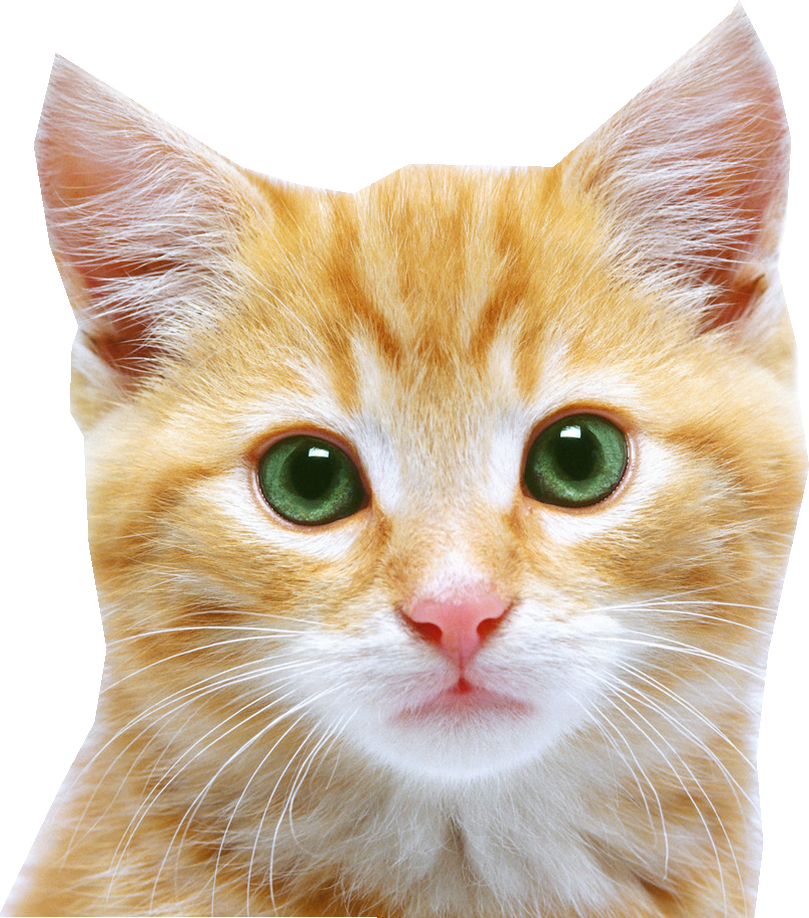

In [5]:
image = Image.open("cat.png").convert("RGB")
text = "a cup of coffee on a saucer"
print(text)
display(image)

In [ ]:
f = open("model_summary.txt", "a")
for clip_model_arch, clip_model_data in tqdm(OPEN_CLIP_MODEL_LIST):
  # Load model
  clip_model, _, clip_preprocess = open_clip.create_model_and_transforms(
    model_name=clip_model_arch, pretrained=clip_model_data
  )
  clip_tokenizer = open_clip.get_tokenizer(clip_model_arch)
  # Preprocess
  text_token = clip_tokenizer([text])
  text_batch, *text_size = text_token.size()
  image_input = clip_preprocess(image).unsqueeze(0)
  image_batch, *image_size = image_input.size()
  # Print
  print(f"{clip_model_arch} ({clip_model_data})", file=f)
  print(f"Text input: {text_size}", file=f)
  print(f"Image input: {image_size}", file=f)
  model_summary = summary(
    model=clip_model, input_data=[image_input, text_token], verbose=0, device="cuda", depth=1,
    col_names=["input_size", "output_size", "num_params", "params_percent", "kernel_size", "mult_adds", "trainable"],
  )
  print(model_summary, file=f)
  print(file=f)
  del clip_model
  del text_token, image_input
f.close()